# Prática Independente - Variáveis dummies.

### Dataset cereais

O dataset a seguir contém informação sobre diferentes cereais.

As categorias nas colunas são:
       
   * **name** : Nome do fabricante
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
      * R = Ralston Purina 
   
   
   * **type**:
      * C = frio  
      * H = quente 
        
   
   * **calories**: calorias por porção
   * **protein**: gramas de proteínas
   * **fat**: gramas de gordura
   * **sodium**: miligramas de sódio
   * **fiber**: gramas de fibra dietética
   * **arbo**: gramas de açúcares complexos
   * **sugars**: gramas de açúcares simples
   * **potass**: miligramas de K
   * **vitamins**: vitaminas e minerais - 0, 25, ou 100, indicando a % recomendado pela FDA.
   * **shelf**: display shelf (1, 2, or 3, counting from the floor)
   * **weight**: peso en onças de uma porção
   * **cups**: número de copos em uma porção 
   * **rating**: classificação dos cereais (Possibly from Consumer Reports?)
        
A partir desta informação:
     
  * Caracterizar o tipo de dado de cada coluna (_string, int, float_) e,
  * Reconhecer o tipo variável (_contínua, categórica_).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ler o Arquivo 'cereal.csv'.

In [ ]:
dados = pd.read_csv('cereal.csv')

In [ ]:
dados.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


`name`: Categórica

`mrf`: Categórica

`type`: Categórica

`protein`:	Discreta

`fat`: Discreta

`sodium`: Discreta

`fiber`: Contínua

`carbo`: Contínua

`sugars`: Discreta

`potass`: Discreta

`vitamins:`	Categórica

`shelf`: Categórica

`weight`: Contínua

`cups`: Contínua

`rating`: Contínua


As variaveis contínuas e discretas podem, porém, serem transformadas em variáveis categóricas ao definirmos intervalos que as classifiquem. Se pegarmos, por exemplo, a variável `rating` (notas dos cereais) que inicialmente é uma variável contínua e definirmos intervalos que representem notas ruins, medias e boas, ela se transformaria, nesse caso, numa variável categórica.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


Variáveis numéricas já em tipos numéricos e as strings da mesma forma.

#### Exercício 1: Imprimir 5 amostras para reconhecimento de dados. Coincidem com as caracterizações realizadas?

In [ ]:
dados.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


A variável name possui outros nomes diferente das categorias dadas na descrição inicial sobre os dados. Essas categorias (o fabricante do produto) na verdade se encontram na coluna `mfr`.


#### Exercício 2: Escolher uma coluna categórica e converter em uma variável dummie, a função `pd.get_dummies()` pode ser usada.


Tranformando a variável type (cereal quente ou frio) em variável dummie.

1 == Sim, a instância daquela linha é a coluna preenchida com 1.

0 == Não, a instância daquela linha não é a coluna preenchida com 0.

In [ ]:
pd.get_dummies(dados['type']).head()

,C,H
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Proporção de cereais quentes e frios

In [ ]:
prop_quente_ou_frio = pd.get_dummies(dados['type']).value_counts(normalize= True) * 100

print(f'Cereais frios: {prop_quente_ou_frio.values[0]:.2f}%')
print(f'Cereais quentes: {prop_quente_ou_frio.values[1]:.2f}%')

Cereais frios: 96.10%
Cereais quentes: 3.90%


Em nosso dataset 96.10% dos cerais são frios e 3.90% são quentes.

#### Exercício 3: Pegar a coluna de fabricante, transformar a variável dummie e contar quantos produtos são pertencentes à marca "Kellogg's".

In [ ]:
pd.get_dummies(dados['mfr']).value_counts()

A  G  K  N  P  Q  R
0  0  1  0  0  0  0    23
   1  0  0  0  0  0    22
   0  0  0  1  0  0     9
            0  1  0     8
               0  1     8
         1  0  0  0     6
1  0  0  0  0  0  0     1
dtype: int64

23 produtos são da marca Kellogg's (K), que tem o maior número de cereais do dataset precedida por General Mills (G) com 22 cereais.

Outra forma de contar variável categóricas é usar a função[`.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [ ]:
dados['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

#### Exercício 4: Organizar os fabricantes por quantidade de produtos em ordem decrescente e apresentá-los em um gráfico.

Fazendo a contagem em forma descrescente e guardando a Series gerada em uma variável

In [ ]:
produtos_por_fabricantes = dados['mfr'].value_counts(ascending= True)

Criando dicionário pra renomear as variáveis categóricas e utiizar seus nomes completos no gráfico

In [ ]:
dicionario_fabricantes = {'A' : 'American Home Food Products',
'G' : 'General Mills',
'K' : 'Kelloggs',
'N' : 'Nabisco',
'P' : 'Post',
'Q' : 'Quaker Oats',
'R' : 'Ralston Purina'}

Renomeando variáveis para seus nomes completos

In [ ]:
produtos_por_fabricantes.rename(index= dicionario_fabricantes, inplace= True)

Series gerada com o nome dos fabricantes e a quantidade de produtos que possuem no dataset

In [ ]:
produtos_por_fabricantes

American Home Food Products     1
Nabisco                         6
Ralston Purina                  8
Quaker Oats                     8
Post                            9
General Mills                  22
Kelloggs                       23
Name: mfr, dtype: int64

In [ ]:
# Definindo largura e algura das figuras que eu fizer neste notebook
plt.rcParams['figure.figsize'] = (11,7)

# Colocando grades nas figuras que eu fizer neste notebook pra facilitar a visualização 
sns.set_theme(style="whitegrid")

Gerando gráfico de barras com as frequências dos cereais por fabricante

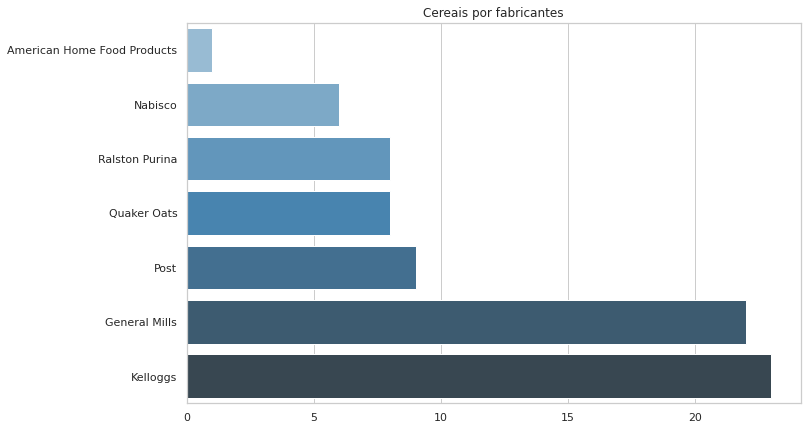

In [ ]:
sns.barplot(x= produtos_por_fabricantes.values, y= produtos_por_fabricantes.index,
            palette="Blues_d", orient= 'h') 

plt.title('Cereais por fabricantes')

plt.show()

O nome da marca `American Home Food Products` não ficou bem mostrado no gráfico com as barras mostradas na vertical. Mesmo tentando rotacionar um pouco o nome das marcas o problema não foi resolvido.

Pra evitar de ter que modificar o nome da marca eu preferi plotar as barras na horizontal e assim a visualização dos nomes dos fabricantes ficaram "limpos".

#### Exercício 5: Pegar as colunas `mfr` e `type`, convertê-las em variáveis dummies simultaneamente e obter uma descrição desse dataframe. Lembre-se que a função `.get_dummies()` permite pegar mais de uma coluna, por exemplo, usando slicing. 

In [ ]:
dados.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# Transformando fabricantes e tipos em variáveis dummies
fabricante_e_tipo = pd.get_dummies(dados[['mfr', 'type']])

In [ ]:
# Contando os valores d cereais de cada fabricante e por tipo (frio ou quente) 
fabricante_e_tipo.value_counts()

mfr_A  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_C  type_H
0      0      1      0      0      0      0      1       0         23
       1      0      0      0      0      0      1       0         22
       0      0      0      1      0      0      1       0          9
                            0      0      1      1       0          8
                                   1      0      1       0          7
                     1      0      0      0      1       0          5
1      0      0      0      0      0      0      0       1          1
0      0      0      1      0      0      0      0       1          1
                     0      0      1      0      0       1          1
dtype: int64

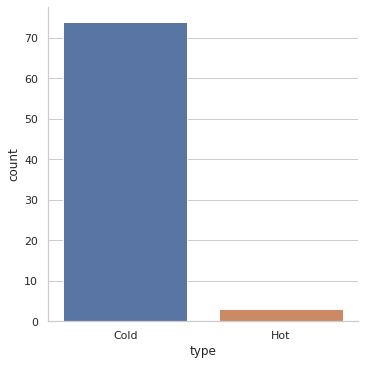

In [ ]:
# Gerando gráfico de frequência dos tipos dos cereais
sns.catplot(x= 'type', data= dados, kind= 'count')

# Modificando nome das barras com respectivos tipos
plt.xticks([0, 1], ['Cold', 'Hot'])

plt.show()

Como dito anteriormente e mostrado no gráfico acima, há a prevalecência dos cereais frios em relação aos quentes tendo em vista que as marcas que mais possuem cereais na amostra tem cereais frios. A grande questão é se há de fato maior número de cereais frios no mercado ou a amostra foi coletada com viés e coletou mais as marcas que possuem produção de cereais frios.

Interessante notar que não há fabricante que produza os dois tipos de cereais: ou o fabricante produz cereal frio ou produz cereal quente, mas nenhum produz os dois. 